In [ ]:
import pandas as pd
import time

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install tensorflow
!pip install pyvi
!pip install gensim
!pip install seaborn
!pip install pyvi
!pip install scikit-learn
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00


In [ ]:
# Replace the problematic import
# from keras.models import Model, Input
from tensorflow.keras.models import Model  # Import Model from tensorflow.keras
from tensorflow.keras.layers import Input  # Import Input from tensorflow.keras.layers

# The rest of your imports remain the same:
from tensorflow.keras.preprocessing.text import Tokenizer  # Use tensorflow.keras instead of just keras
from pyvi import ViTokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, Flatten
#from keras.models import Model, Input # This line has been replaced
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix
from pyvi import ViTokenizer
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split # Import the necessary function
from sklearn.metrics import classification_report # Import the classification_report function
from sklearn.pipeline import Pipeline # Import the Pipeline class from sklearn.pipeline
from sklearn.feature_extraction.text import TfidfTransformer # Import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Replace the problematic import
# from keras.models import Model, Input
from tensorflow.keras.models import Model  # Import Model from tensorflow.keras
from tensorflow.keras.layers import Input  # Import Input from tensorflow.keras.layers

# The rest of your imports remain the same:
from tensorflow.keras.preprocessing.text import Tokenizer  # Use tensorflow.keras instead of just keras
from pyvi import ViTokenizer
from gensim.models import Word2Vec
#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, Flatten
#from keras.models import Model, Input # This line has been replaced
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
import multiprocessing
import time

sn.set()

In [ ]:
df = pd.read_csv('/content/CGV reviews sentiment 2.csv')
df.head()

,reviewer,time,context,ranking,Chi nhánh,Sentiment,pre_context,tokens
0,Huyền Nguyễn,3 tháng trước,"Mình đã đặt vé trước qua app, khi đến lấy vé l...",1,CGV Hoàng Văn Thụ,0,vé app vé hướng phòng chiếu rạp 2 tầng tầng 1 ...,"['vé', 'app', 'vé', 'hướng', 'phòng', 'chiếu',..."
1,Đạt Nguyễn Thành,9 tháng trước,"Rạp quá nóng xem phim mấy lần quá nóng , góp ý...",1,CGV Satra Củ Chi,0,rạp nóng phim mấy nóng góp khắc phục góp công ...,"['rạp', 'nóng', 'phim', 'mấy', 'nóng', 'góp', ..."
2,Khánh Lâm Nguyễn,một năm trước,"Mua vé không hỏi trẻ em hay người lớn, cứ thế ...",1,CGV Pandora City,0,mua vé trẻ tiền bill đồng vé hệ thống hệ thống,"['mua', 'vé', 'trẻ', 'tiền', 'bill', 'đồng', '..."
3,Lý Thanh Phong,4 tháng trước,"Nhân viên vô duyên, thiếu thân thiện và đứng c...",1,CGV Sư Vạn Hạnh,0,nhân viên vô duyên thân thiện đứng hỗ trợ hàng...,"['nhân_viên', 'vô_duyên', 'thân_thiện', 'đứng'..."
4,Anh Diệp Phúc,10 tháng trước,Mình đi xem phim suất 9h. Nhưng 9h05 vẫn chưa ...,1,CGV Vincom Thủ Đức,0,đi phim suất 9h 9h05 quầy vé hỉ bắp quản lý tệ 2,"['đi', 'phim', 'suất', '9h', '9h05', 'quầy', '..."


In [ ]:
df = df.drop(columns=['reviewer','time','ranking','Chi nhánh','pre_context','tokens'])
df.head()

,context,Sentiment
0,"Mình đã đặt vé trước qua app, khi đến lấy vé l...",0
1,"Rạp quá nóng xem phim mấy lần quá nóng , góp ý...",0
2,"Mua vé không hỏi trẻ em hay người lớn, cứ thế ...",0
3,"Nhân viên vô duyên, thiếu thân thiện và đứng c...",0
4,Mình đi xem phim suất 9h. Nhưng 9h05 vẫn chưa ...,0


In [ ]:
X = df['context']
y = df['Sentiment']

##### Tiền xử lý dữ liệu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **GRID SEARCH 3 CÁI**

In [ ]:
# Danh sách n-grams để kiểm tra
ngram_ranges = [(1, 1), (1, 2), (2, 2), (2, 3)]

# Khởi tạo các mô hình
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000),
    'SVM': SVC(gamma='scale')
}

# Tìm kiếm n-gram tốt nhất
best_ngram = None
best_avg_accuracy = 0

print("Evaluating n-grams...")

for ngram_range in ngram_ranges:
    print(f"Testing ngram_range: {ngram_range}")
    accuracies = []

    for model_name, model in models.items():
        pipeline = Pipeline([
            ('vect', TfidfVectorizer(ngram_range=ngram_range)),
            ('clf', model)
        ])

        # Huấn luyện mô hình
        pipeline.fit(X_train, y_train)

        # Dự đoán trên tập kiểm tra
        y_pred = pipeline.predict(X_test)

        # Tính độ chính xác
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"  {model_name} accuracy: {acc:.4f}")

    # Tính trung bình độ chính xác cho n-gram hiện tại
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"  Average accuracy for ngram_range {ngram_range}: {avg_accuracy:.4f}\n")

    # Cập nhật n-gram tốt nhất nếu cần
    if avg_accuracy > best_avg_accuracy:
        best_ngram = ngram_range
        best_avg_accuracy = avg_accuracy

print(f"Best n-gram range: {best_ngram} with average accuracy: {best_avg_accuracy:.4f}")


Evaluating n-grams...
Testing ngram_range: (1, 1)
  Naive Bayes accuracy: 0.8537
  Logistic Regression accuracy: 0.8800
  SVM accuracy: 0.8784
  Average accuracy for ngram_range (1, 1): 0.8707

Testing ngram_range: (1, 2)
  Naive Bayes accuracy: 0.7872
  Logistic Regression accuracy: 0.8743
  SVM accuracy: 0.8817
  Average accuracy for ngram_range (1, 2): 0.8477

Testing ngram_range: (2, 2)
  Naive Bayes accuracy: 0.7913
  Logistic Regression accuracy: 0.8258
  SVM accuracy: 0.8348
  Average accuracy for ngram_range (2, 2): 0.8173

Testing ngram_range: (2, 3)
  Naive Bayes accuracy: 0.7749
  Logistic Regression accuracy: 0.8044
  SVM accuracy: 0.8127
  Average accuracy for ngram_range (2, 3): 0.7973

Best n-gram range: (1, 1) with average accuracy: 0.8707


## **NAIVES BAYES**

In [ ]:
start_time = time.time()

pipe_line_nb = Pipeline([
    ('vect', TfidfVectorizer()),  # Sử dụng TfidfVectorizer
    ('clf', MultinomialNB())      # Mô hình Naive Bayes
])

pipe_line_nb.fit(X_train, y_train)

train_time_nb = time.time() - start_time
print('Naive Bayes with TfidfVectorizer in', train_time_nb, 'seconds')


Naive Bayes with TfidfVectorizer in 0.13504695892333984 seconds


In [ ]:
y_pred = pipe_line_nb.predict(X_test)

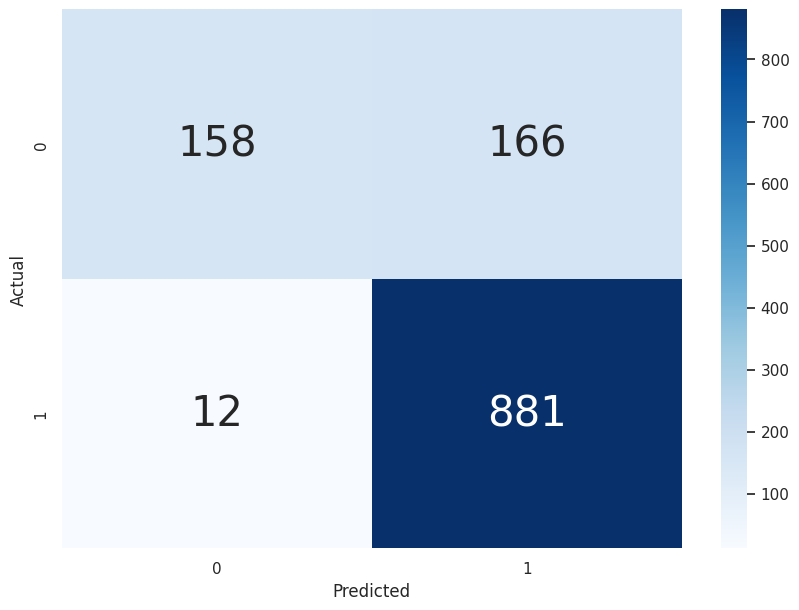

In [ ]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.49      0.64       324
           1       0.84      0.99      0.91       893

    accuracy                           0.85      1217
   macro avg       0.89      0.74      0.77      1217
weighted avg       0.86      0.85      0.84      1217



In [ ]:
entries = []

In [ ]:

entries.append(['Naive Bayes', pipe_line_nb.score(X_train, y_train),
                    pipe_line_nb.score(X_test, y_test), abs(pipe_line_nb.score(X_train, y_train)-pipe_line_nb.score(X_test, y_test)),
                    train_time_nb])

## **LOGISTIC REGRESSION**

In [ ]:
start_time = time.time()

pipe_line_lg = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000))
])

pipe_line_lg.fit(X_train, y_train)

train_time_lg = time.time() - start_time
print('Logistic Regression with TfidfVectorizer in', train_time_lg, 'seconds')

Logistic Regression with TfidfVectorizer in 0.17509245872497559 seconds


In [ ]:
y_pred = pipe_line_lg.predict(X_test)

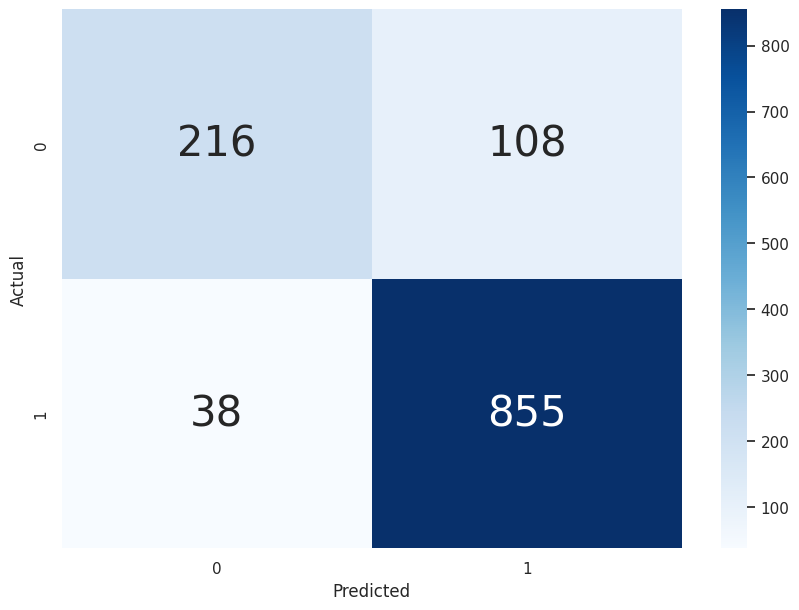

In [ ]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       324
           1       0.89      0.96      0.92       893

    accuracy                           0.88      1217
   macro avg       0.87      0.81      0.83      1217
weighted avg       0.88      0.88      0.88      1217



In [ ]:
entries.append(['Logistic Regression', pipe_line_lg.score(X_train, y_train),
                    pipe_line_lg.score(X_test, y_test), abs(pipe_line_lg.score(X_train, y_train)-pipe_line_lg.score(X_test, y_test)),
                    train_time_lg])

## **SVM**

In [ ]:
from sklearn.svm import SVC

start_time = time.time()
pipe_line_sv = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', SVC(gamma='scale'))
                    ])
pipe_line_sv.fit(X_train, y_train)

train_time_sv = time.time() - start_time
print('SVM in', train_time_sv, 'seconds')

SVM in 3.6875827312469482 seconds


In [ ]:
y_pred = pipe_line_sv.predict(X_test)

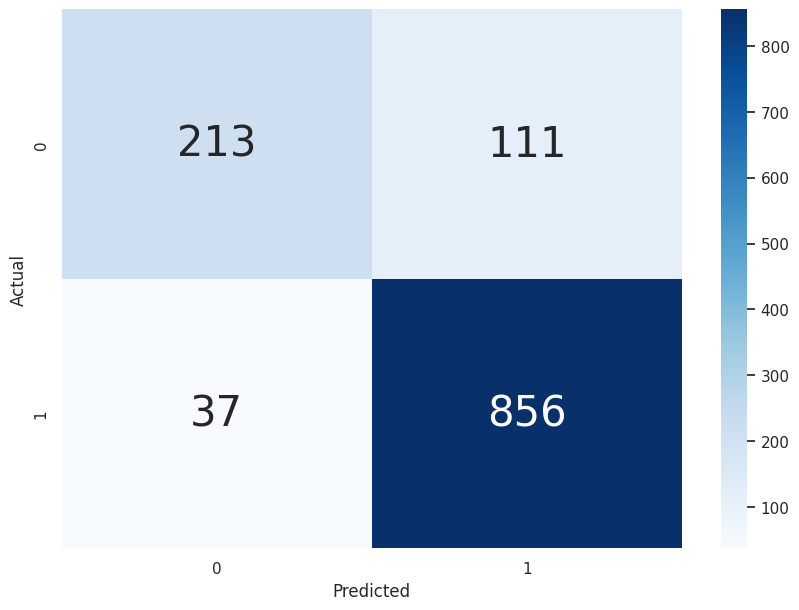

In [ ]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       324
           1       0.89      0.96      0.92       893

    accuracy                           0.88      1217
   macro avg       0.87      0.81      0.83      1217
weighted avg       0.88      0.88      0.87      1217



In [ ]:
entries.append(['SVM', pipe_line_sv.score(X_train, y_train),
                    pipe_line_sv.score(X_test, y_test), abs(pipe_line_sv.score(X_train, y_train)-pipe_line_sv.score(X_test, y_test)),
                    train_time_sv])

In [ ]:
from sklearn.svm import SVC

## **MẠNG NEURAL SỬ DỤNG TFIDF**

In [ ]:
# 2. Vector hóa dữ liệu bằng TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Giới hạn số lượng đặc trưng (từ)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# 3. Chuyển đổi nhãn sang dạng one-hot
num_classes = len(np.unique(y))  # Số lớp (2: negative, positive)
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# 4. Xây dựng mô hình Neural Network
model_tfidf = Sequential()

# Lớp đầu vào và hidden layers
model_tfidf.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model_tfidf.add(Dropout(0.3))  # Dropout để giảm overfitting
model_tfidf.add(Dense(256, activation='relu'))
model_tfidf.add(Dropout(0.3))

# Lớp đầu ra
model_tfidf.add(Dense(num_classes, activation='softmax'))  # Phân loại 2 lớp

# Compile mô hình
model_tfidf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra cấu trúc mô hình để kiểm tra
model_tfidf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       2,143,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,275,586 (8.68 MB)

 Trainable params: 2,275,586 (8.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Huấn luyện mô hình
start_time = time.time()
history_tfidf = model_tfidf.fit(
    X_train_tfidf,
    y_train_encoded,
    validation_data=(X_test_tfidf, y_test_encoded),
    batch_size=128,
    epochs=15,
    verbose=0
)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.2f} giây")

Thời gian huấn luyện: 40.99 giây


In [ ]:
# 6. Đánh giá mô hình
# Đánh giá trên tập test
test_loss, test_accuracy = model_tfidf.evaluate(X_test_tfidf, y_test_encoded, verbose=0)
print(f"Độ chính xác trên tập test: {test_accuracy:.2f}")

# Dự đoán nhãn
y_pred_probs = model_tfidf.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Tính độ chính xác trên tập train và test
train_accuracy = model_tfidf.evaluate(X_train_tfidf, y_train_encoded, verbose=0)[1]
test_accuracy = model_tfidf.evaluate(X_test_tfidf, y_test_encoded, verbose=0)[1]
train_test_gap = abs(train_accuracy - test_accuracy)  # Khoảng cách giữa train và test accuracy

# Lưu kết quả vào danh sách entries để so sánh
train_time = train_time  # Thời gian đã tính trước đó khi huấn luyện mô hình
entries.append(['Neural Network TF-IDF', train_accuracy, test_accuracy, train_test_gap, train_time])

Độ chính xác trên tập test: 0.88
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       324
           1       0.92      0.91      0.92       893

    accuracy                           0.88      1217
   macro avg       0.84      0.84      0.84      1217
weighted avg       0.88      0.88      0.88      1217



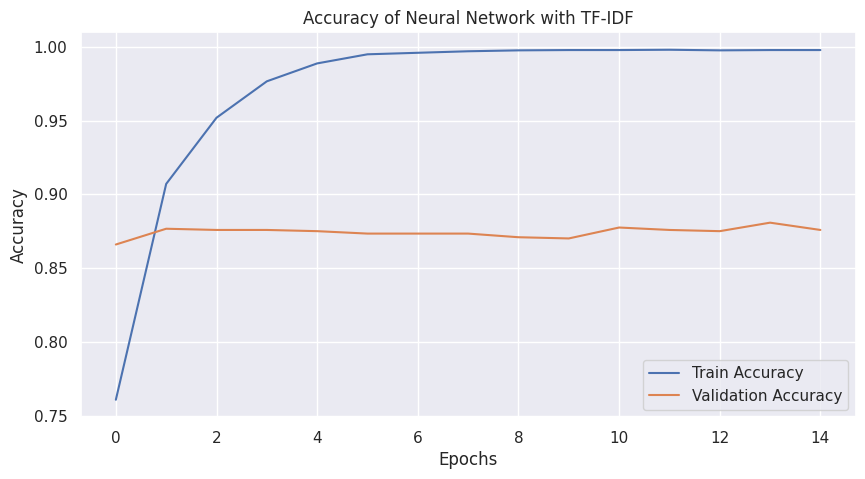

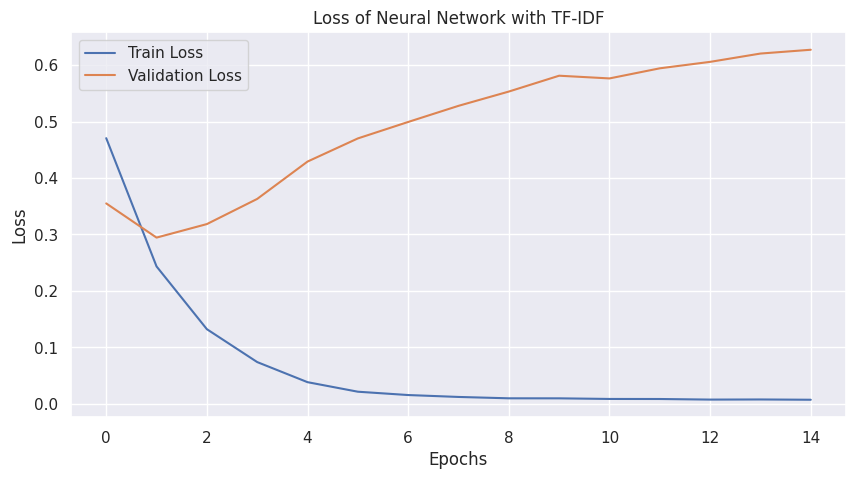

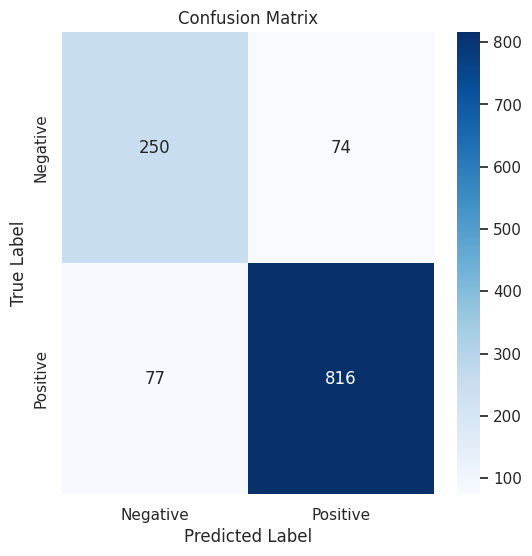

In [ ]:
# 7. Báo cáo kết quả
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# 8. Trực quan hóa quá trình huấn luyện
# Accuracy qua các epoch
plt.figure(figsize=(10, 5))
plt.plot(history_tfidf.history['accuracy'], label='Train Accuracy')
plt.plot(history_tfidf.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy of Neural Network with TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss qua các epoch
plt.figure(figsize=(10, 5))
plt.plot(history_tfidf.history['loss'], label='Train Loss')
plt.plot(history_tfidf.history['val_loss'], label='Validation Loss')
plt.title('Loss of Neural Network with TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 9. Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 6))
sn.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative',  'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## **MẠNG NEURAL SỬ DỤNG Word Embedding**

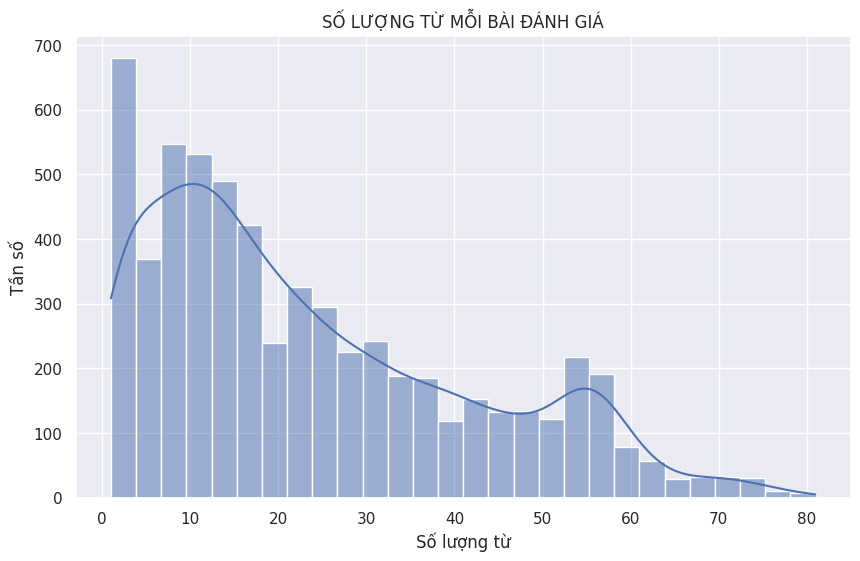

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sn.histplot(df['context'].str.split().map(lambda x: len(x)), kde=True) # Use histplot for better visualization

# Customize the plot (optional)
plt.title('SỐ LƯỢNG TỪ MỖI BÀI ĐÁNH GIÁ')
plt.xlabel('Số lượng từ')
plt.ylabel('Tần số')
plt.show()

In [ ]:
# Thiết lập tham số cố định
max_len = 100  # Độ dài tối đa của câu
batch_size = 128  # Kích thước batch khi huấn luyện
epochs = 15  # Số lượng epoch huấn luyện

# 1. Tiền xử lý dữ liệu
# Tokenizer giúp chuyển văn bản thành các chỉ số tương ứng trong từ vựng
word_tokenizer = Tokenizer(oov_token=-1)  # Từ không xác định (oov_token)
word_tokenizer.fit_on_texts(X_train)  # Xây dựng từ vựng dựa trên tập train

# Từ điển ánh xạ từ -> chỉ số và thêm các token đặc biệt
word_2_index = word_tokenizer.word_index
word_2_index['pad'] = 0  # PAD token dùng để padding
word_2_index['unk'] = -1  # UNK token cho từ không có trong từ vựng

In [ ]:
# Hàm chuyển đổi văn bản thành các chỉ số (encoding)
def encoding(X):
    sentences = []
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)  # Tách từ bằng pyvi
        sentences.append(tokenized_sentence)

    # Ánh xạ câu sang danh sách chỉ số
    X = word_tokenizer.texts_to_sequences(sentences)
    # Padding để các câu có độ dài bằng nhau (max_len)
    X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=word_2_index['pad'])
    return X

In [ ]:
# Áp dụng encoding cho tập train và test
X_train_encoded = encoding(X_train)
X_test_encoded = encoding(X_test)

In [ ]:
# 2. Xây dựng mô hình mạng Neural Network
num_words = len(word_2_index)  # Số từ trong từ điển (vocabulary size)

# Các lớp của mô hình
input_layer = Input(shape=(max_len,))  # Lớp đầu vào (với kích thước max_len)
embedding_layer = Embedding(input_dim=num_words+1, output_dim=300, input_length=max_len)(input_layer)  # Lớp nhúng từ
flat_layer = Flatten()(embedding_layer)  # Flatten embedding để phù hợp với lớp Dense
output_layer = Dense(2, activation='softmax')(flat_layer)  # Lớp đầu ra với 2 lớp (nhãn sentiment)

# Khởi tạo mô hình
model_Neural_WE = Model(input_layer, output_layer)

# Compile mô hình với các tham số
# Loss function: categorical_crossentropy (phù hợp với bài toán phân loại nhiều lớp)
# Optimizer: Adam (hiệu quả trong xử lý dữ liệu văn bản)
# Metric: accuracy (đo độ chính xác của dự đoán)
model_Neural_WE.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra cấu trúc mô hình để kiểm tra
model_Neural_WE.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 300)            │       1,382,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │          60,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,442,402 (5.50 MB)

 Trainable params: 1,442,402 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. Huấn luyện mô hình
start_time = time.time()  # Đo thời gian bắt đầu huấn luyện
history_Neural_WE = model_Neural_WE.fit(
    X_train_encoded,  # Dữ liệu huấn luyện đã mã hóa
    to_categorical(y_train, num_classes=2),  # Biến y_train chuyển thành dạng one-hot
    validation_data=(X_test_encoded, to_categorical(y_test, num_classes=2)),  # Dữ liệu validation
    batch_size=batch_size,  # Số lượng mẫu trên mỗi batch
    epochs=epochs,  # Số epoch
    verbose=1  # Ẩn thông tin chi tiết của quá trình huấn luyện
)
train_time_nn = time.time() - start_time  # Thời gian huấn luyện

Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7534 - loss: 0.5344 - val_accuracy: 0.8348 - val_loss: 0.3854
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8937 - loss: 0.2854 - val_accuracy: 0.8800 - val_loss: 0.3026
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9321 - loss: 0.1801 - val_accuracy: 0.8915 - val_loss: 0.2944
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9582 - loss: 0.1297 - val_accuracy: 0.8858 - val_loss: 0.2977
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9746 - loss: 0.0867 - val_accuracy: 0.8899 - val_loss: 0.3028
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9873 - loss: 0.0574 - val_accuracy: 0.8891 - val_loss: 0.3161
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9912 - loss: 0.0449 - val_accuracy: 0.8874 - val_loss: 0.3273
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9946 - loss: 0.0303 - val_accuracy: 0.8825 - v

In [ ]:
# 4. Đánh giá mô hình và dự đoán
# Dự đoán trên tập test
y_pred_Neural_WE = model_Neural_WE.predict(X_test_encoded)

# Chuyển kết quả dự đoán từ dạng xác suất sang nhãn
y_pred_classes = np.argmax(y_pred_Neural_WE, axis=1)

# Tính độ chính xác trên tập train và test
train_accuracy = model_Neural_WE.evaluate(X_train_encoded, to_categorical(y_train, num_classes=2), verbose=0)[1]
test_accuracy = model_Neural_WE.evaluate(X_test_encoded, to_categorical(y_test, num_classes=2), verbose=0)[1]
train_test_gap = abs(train_accuracy - test_accuracy)  # Khoảng cách giữa độ chính xác tập train và test

# Lưu kết quả vào danh sách entries để so sánh
entries.append(['Neural Network Word Embedding', train_accuracy, test_accuracy, train_test_gap, train_time_nn])

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


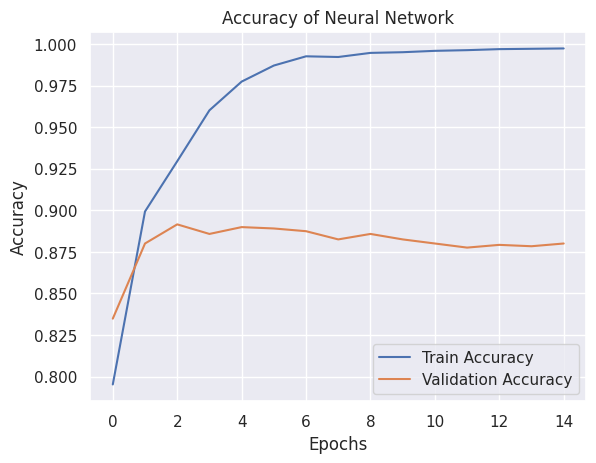

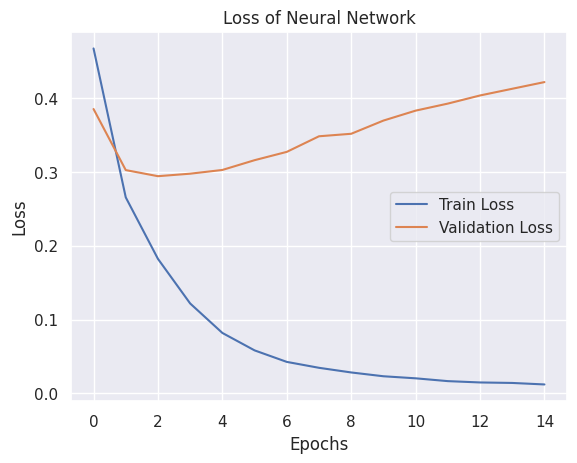

In [ ]:
# 5. Trực quan hóa lịch sử huấn luyện
# Accuracy qua các epoch
plt.figure(0)
plt.plot(history_Neural_WE.history['accuracy'], label='Train Accuracy')
plt.plot(history_Neural_WE.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy of Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss qua các epoch
plt.figure(1)
plt.plot(history_Neural_WE.history['loss'], label='Train Loss')
plt.plot(history_Neural_WE.history['val_loss'], label='Validation Loss')
plt.title('Loss of Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       324
           1       0.90      0.94      0.92       893

    accuracy                           0.88      1217
   macro avg       0.86      0.83      0.84      1217
weighted avg       0.88      0.88      0.88      1217



## SO SÁNH 5 cái

In [ ]:
cv_df = pd.DataFrame(entries,
                     columns=['model_name', 'score_train_mean',
                              'score_test_mean', 'abs|score|', 'time_mean'])

In [ ]:
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,Naive Bayes,0.887359,0.853739,0.033620,0.135047
1,Logistic Regression,0.921480,0.880033,0.041447,0.175092
2,SVM,0.977595,0.878389,0.099206,3.687583
3,Neural Network TF-IDF,0.997944,0.875924,0.122020,40.990915
4,Neural Network Word Embedding,0.997739,0.880033,0.117706,39.069452


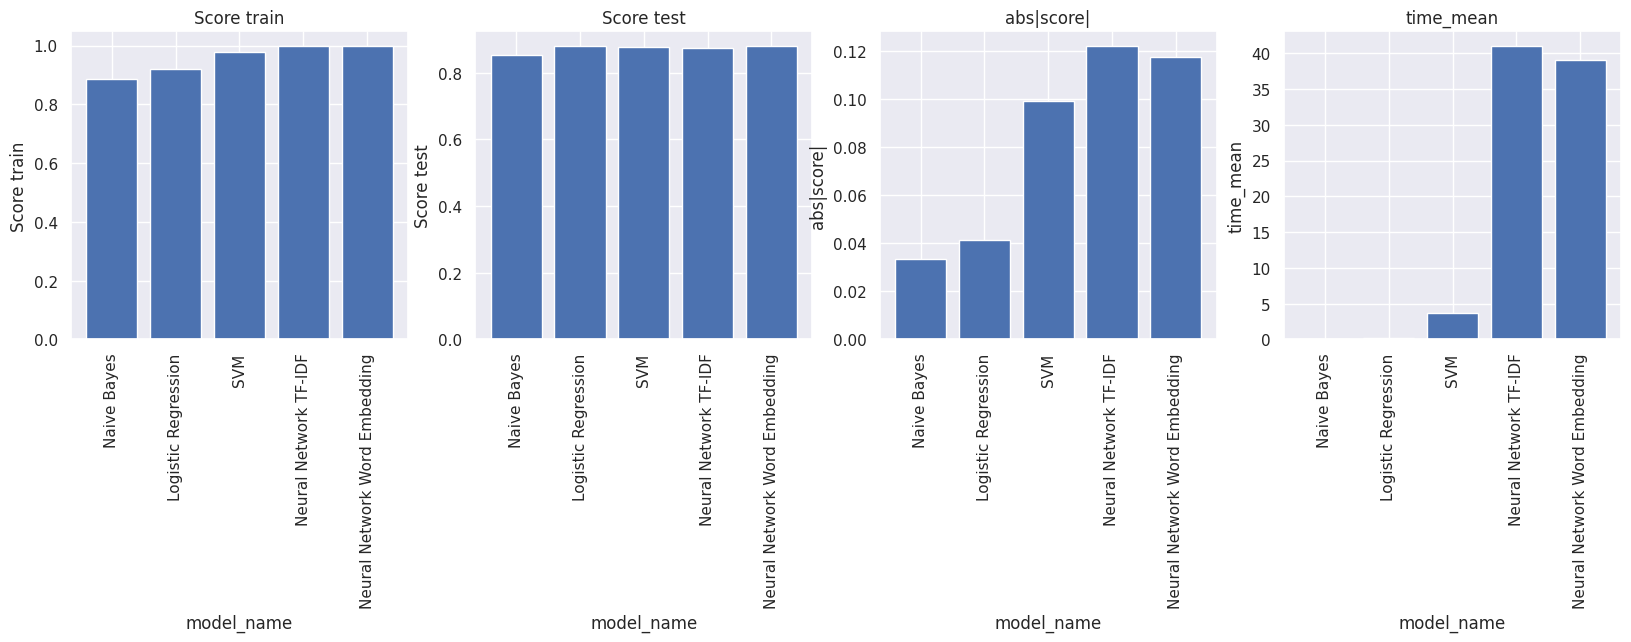

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.bar(cv_df['model_name'],cv_df['score_train_mean'])
plt.xlabel('model_name')
plt.ylabel('Score train')
plt.xticks(rotation='vertical')
plt.title("Score train")

plt.subplot(1, 4, 2)
plt.bar(cv_df['model_name'],cv_df['score_test_mean'])
plt.xlabel('model_name')
plt.ylabel('Score test')
plt.xticks(rotation='vertical')
plt.title("Score test")

plt.subplot(1, 4, 3)
plt.bar(cv_df['model_name'],cv_df['abs|score|'])
plt.xlabel('model_name')
plt.ylabel('abs|score|')
plt.xticks(rotation='vertical')
plt.title("abs|score|")

plt.subplot(1, 4, 4)
plt.bar(cv_df['model_name'],cv_df['time_mean'])
plt.xlabel('model_name')
plt.ylabel('time_mean')
plt.xticks(rotation='vertical')
plt.title("time_mean")

plt.show()

In [ ]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'score_train_mean', 'score_test_mean', 'abs|score|', 'time_mean'])
print(cv_df)

                      model_name  score_train_mean  score_test_mean  \
0                    Naive Bayes          0.887359         0.853739   
1            Logistic Regression          0.921480         0.880033   
2                            SVM          0.977595         0.878389   
3          Neural Network TF-IDF          0.997944         0.875924   
4  Neural Network Word Embedding          0.997739         0.880033   

   abs|score|  time_mean  
0    0.033620   0.135047  
1    0.041447   0.175092  
2    0.099206   3.687583  
3    0.122020  40.990915  
4    0.117706  39.069452  
